<a href="https://colab.research.google.com/github/edward920199115/ML-HomeWork/blob/main/10%E7%AB%A0_Keras%E4%BA%BA%E5%B7%A5%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E7%AE%80%E4%BB%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##10.2 从生物神经元到人工神经元

###10.2.1 安装Tensorflow2


In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.12.0'

In [3]:
keras.__version__

'2.12.0'

###10.2.2 使用顺序API构建图像分类器

In [4]:
# 1.使用Keras加载数据集
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# 2.查看训练集的形状和数据类型
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
# 3.划分验证集，并将输入特征转化为0-1之间
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
# 4.不同与手写数字，Fashion MNIST需要一个类名列表来知道我们处理的内容。
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
# 查看训练集中的某个图像
print(class_names[y_train[0]])
print(class_names[y_train[1]])
print(class_names[y_train[2]])

Coat
T-shirt/top
Sneaker


In [10]:
28*28

784

In [11]:
# 5.使用顺序API创建模型,先创建一个具有2个隐藏层的分类MLP
# Flatten v. 使...变平
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # 将图像转化为一维数组
model.add(keras.layers.Dense(300,activation="relu")) # 300个神经元
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [12]:
# 6.查看制作神经网络模型的所有层
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
784*300+300 # 第一层与第二层之间有784*300个权重w，外加300个偏置b

235500

In [14]:
#7.获取模型的层列表
model.layers 

In [15]:
#8.按层索引获取层
hidden1 = model.layers[1] 

In [16]:
hidden1.name

'dense'

In [17]:
#9.按名称获取层
model.get_layer('dense') is hidden1 

True

In [18]:
#10.访问层的所有参数
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[ 0.00752527, -0.04467747,  0.04742545, ...,  0.02197213,
         0.02994265,  0.05672842],
       [ 0.03158768, -0.07421775,  0.01915623, ..., -0.04649031,
        -0.04420719, -0.01929738],
       [ 0.00816996,  0.06779312, -0.02652978, ..., -0.05694493,
         0.03033815,  0.02300826],
       ...,
       [-0.06872929, -0.05231122,  0.07071543, ..., -0.04496317,
         0.07345973,  0.0425822 ],
       [ 0.00757295,  0.03343101, -0.04614008, ..., -0.01515774,
         0.00407886,  0.02701227],
       [-0.05973123, -0.06984734,  0.00019749, ..., -0.04933341,
        -0.00785074, -0.01746428]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
#11.编译模型
from tensorflow.python.training.saver import metrics
from keras.utils.sidecar_evaluator import optimizer

"""
1、如何选loss？
①多分类任务，且label为one-hot就用loss="categorical_crossentropy"
②多分类任务，且label为interger就用loss="sparse_categorical_crossentropy"
③2分类任务，就用loss="bibary_crossentropy"

2、如何选输出层的激活函数？
①2分类：用sigmoid
②多分类：用softmax
③Relu或改进ReLu效率是最高的，因为它不会激活所有神经元。
"""
model.compile(loss="sparse_categorical_crossentropy", # 交叉熵损失函数
        optimizer="sgd",
        metrics=["accuracy"]) # 分类器需要测量accuracy

In [24]:
#12.训练和评估模型
"""
通常，在训练有监督的机器学习模型的时候，会将数据划分为训练集、验证集合测试集，划分比例一般为6:2:2。对原始数据进行三个集合的划分，是为了能够选出效果（可以理解为准确率）最好的、泛化能力最佳的模型。
①训练集train_set
作用是用来拟合模型，通过设置分类器的参数，训练分类模型。后续结合验证集作用时，会选出同一参数的不同取值，拟合出多个分类器。
②验证集Cross Validation set
调整超参数（反向传播调整不了）
作用是当通过训练集训练出多个模型后，为了能找出效果最佳的模型，使用各个模型对验证集数据进行预测，并记录模型准确率。选出效果最佳的模型所对应的参数，即用来调整模型参数。如svn中的参数c和核函数等
若训练集的性能远远好于验证集，说明模型可能过拟合了
③测试集Test set
通过训练集和验证集得出最优模型后，使用测试集进行模型预测。用来衡量该最优模型的性能和分类能力。即可以把测试集当做从来不存在的数据集，当已经确定模型参数后，使用测试集进行模型性能评价。

防止模型过拟合。当使用了所有的原始数据去训练模型，得到的结果很可能是该模型最大程度地拟合了原始数据，亦即该模型是为了拟合所有原始数据而存在。当新的样本出现，再使用该模型进行预测，效果可能还不如只使用一部分数据训练的模型。


"""
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

# 结论1：随着训练轮次的增加，训练loss损失逐渐减少，模型越来越接近真实
# 结论2：经过30个训练轮次后，验证准确率（精度）val_accuracy达到了89.52%，这与训练准确率accuracy91.97%相差不大，似乎没发生过拟合。

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6986 - accuracy: 0.7693 - val_loss: 0.5184 - val_accuracy: 0.8178
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4827 - accuracy: 0.8311 - val_loss: 0.4407 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4412 - accuracy: 0.8454 - val_loss: 0.4222 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4133 - accuracy: 0.8548 - val_loss: 0.4197 - val_accuracy: 0.8520
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3948 - accuracy: 0.8619 - val_loss: 0.3798 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3781 - accuracy: 0.8666 - val_loss: 0.3699 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3655 - accuracy: 0.8699 - val_loss: 0.3716 - val_accur

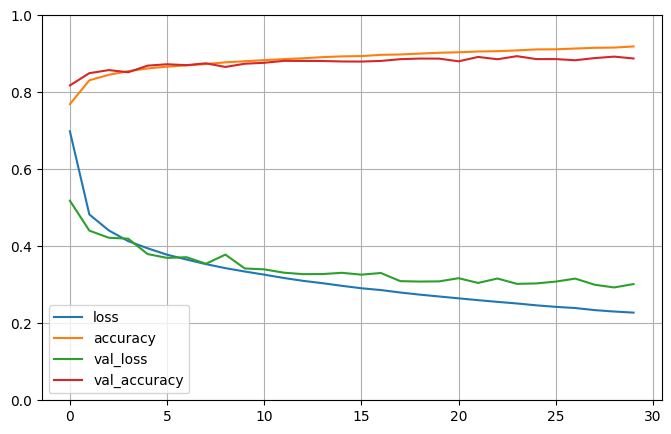

In [25]:
#13.查看学习曲线
# 每个轮次测得的平均训练损失和准确率，以及每个轮次结束时测得的平均验证损失和准确率
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #使用matplotlib库中的pyplot模块中的gca()函数来获取当前的Axes对象，然后使用setylim()函数将y轴的范围设置为0到1。这将确保y轴的范围在0到1之间，以便更好地显示数据。
plt.show()

In [26]:
# 若对模型不满意可以调整模型的几个超参数
"""
①首先可以调学习率
②其次更改优化器
③调整模型超参数：层数、每层神经元数机用于每个隐藏层的激活函数类型
④批处理大小fit(batch_size) ，默认32
⑤sample_weight

"""

'\n①首先可以调学习率\n②其次更改优化器\n③调整模型超参数：层数、每层神经元数机用于每个隐藏层的激活函数类型\n④批处理大小fit(batch_size) ，默认32\n⑤sample_weight\n\n'

In [27]:
#14.评估模型
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 53.2599 - accuracy: 0.8617


[53.259918212890625, 0.8616999983787537]

In [28]:
#15.使用模型进行预测
"""
一行代表一个实例，对于每个实例，模型估计从0类到9类每个类的概率
例：对于第一个实例，模型认为其为第9种类型的概率为100%
"""
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 1s 528ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
# 只关心概率最高的类,可以使用predict方法来获取每个类别的概率分数，然后使用argmax函数获取最高概率的类别
y_pred_prob = model.predict(X_new)
y_pred = y_pred_prob.argmax(axis=-1)
y_pred

1/1 [==============================] - 0s 36ms/step


array([9, 2, 1])

###10.2.3使用顺序API构建回归MLP

In [39]:
#1.加载加州住房数据，并直接将其分成训练集、验证集和测试集，再按比例缩放所有特征（由于其只有数字特征，且没有缺失值，所以直接分数据即可）
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [40]:
#2.使用顺序API构建、训练、评估和使用回归MLP模型

# 构建模型
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # 输出层仅有1个神经元
])

# 编译模型
model.compile(loss="mean_squared_error", optimizer="sgd")

# 训练模型
hostory = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# 评估模型
mse_test = model.evaluate(X_test, y_test)

# 预测（使用模型）
X_new = X_test[:3] # 假设这些都是新的实例
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 1.1062 - val_loss: 21.1818
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 1.0235 - val_loss: 0.5490
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4512 - val_loss: 0.4304
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4132 - val_loss: 0.4208
Epoch 5/20
363/363 [==============================] - 4s 11ms/step - loss: 0.3982 - val_loss: 0.4101
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3905 - val_loss: 0.4100
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3854 - val_loss: 0.3978
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3812 - val_loss: 0.3977
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3727 - val_loss: 0.4042
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3705 - val_loss: 0.39

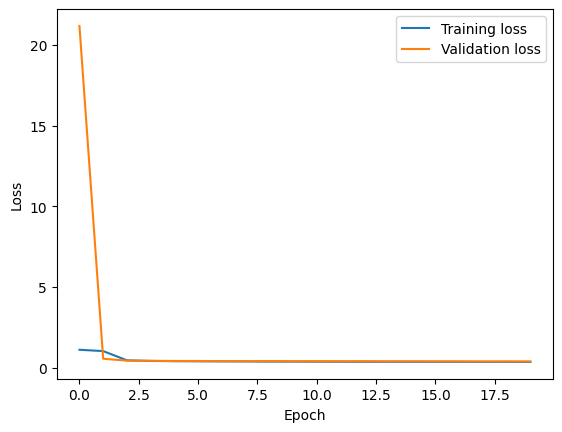

In [42]:
# 3.查看学习曲线
# 查看训练和验证损失的图片
import matplotlib.pyplot as plt

train_loss = hostory.history['loss']
val_loss = hostory.history['val_loss']

plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###10.2.4使用函数式API构建复杂模型 P436

没咋看



In [38]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])

###10.2.5使用子类API构建动态模型 P442
没看 

###10.2.6保存和还原模型P443
保存训练好的模型，避免下次训练浪费时间

In [44]:
#1.保存训练好的keras模型
model.save("my_keras_10.2.3mdoel.h5")

In [46]:
#2.加载模型
model = keras.models.load_model("my_keras_10.2.3mdoel.h5")

###10.2.7使用回调函数
（没看）
如果训练持续几个小时怎么办？这是很常见的，尤其是在大
型数据集上进行训练时。在这种情况下，你不仅应该在训练结束时保存
模型，还应该在训练过程中定期保存检查点，以免在计算机崩溃时丢失
所有内容。但是如何告诉fit（）方法保存检查点呢？使用回调

###10.2.8使用TensorBoard进行可视化
没看

##10.3 微调神经网络超参数

更多的超参数调整可以参考文献：
Leslie N.Smith ， “A Disciplined Approach to Neural
Network Hyper-Parameters：Part 1—Learning Rate，Batch Size，
Momentum ， and Weight Decay” ， arXiv preprint arXiv ：
1803.09820（2018）.



In [47]:
#1.创建一个函数，在给定一组超参数的情况下构建并编译Keras模型
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activatio="relu"))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model

In [48]:
#2.基于build_model()函数创建一个KerasRegressor
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-48-0d5744524108>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [52]:
#3.可以像常规一样，使用fit()方法进行训练，使用score()方法进行评估，使用predict()方法进行预测。
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)], activation='relu')
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

TypeError: ignored

###10.3.1隐藏层数量
对于复杂的问题，深层网络的参数效率要比浅层网络高得多：与浅层网络相比，深层网络可以使用更少的神经元对复杂的函数进行建模，从而使它们在相同数量的训练数据下可以获得更好的性能

###10.3.2每个隐藏层的神经元数量
通常将隐藏层调整大小以形成金字塔状，每层的神经元越来越少，因为许多低层特征可以合并成更少的高层特征。

###10.3.3 学习率、批量大小和其他超参数

 1.【学习率】
一般而言，最佳学习率约为最大学习率的一半（即学习率大于算法发散的学习率，如我们在第4章中看到的）。

2.【优化器】
选择比普通的小批量梯度下降更好的优化器（并调整其超参数）也很重要。我们将在第11章中了解几个高级优化器

3.【批量大小】

4.【激活函数】
①隐藏层都用ReLu
②输出层二分类就用sigmoid；多分类就用softmax；其他的tanh、Relu取决于任务

5.【迭代次数】不需要调整，可以使用提前停止